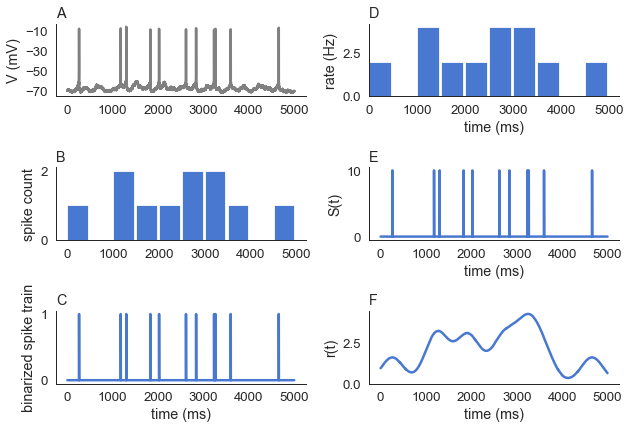

In [11]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

# Keep this set to false unless you want to save figures and data
# (in which case you'll need to change some directories below)
SaveFigures=False
###############################################
###############################################

# Load the data from a file
if 'google.colab' in str(get_ipython()):
    url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/DataFiles/RealMembranePotentialData.npz"
    file = np.DataSource().open(url)
    data = np.load(file.name, allow_pickle=True)
else:
    data = np.load('./DataFiles/RealMembranePotentialData.npz', allow_pickle=True)


    
# Extract the data from the data dictionary to arrays
V=data['V']
SpikeTimes=data['SpikeTimes']
dt=data['dt']
T=data['T']
time=data['time']

# Bin size and discretized time for computing counts
dtRate=500
SpikeCountTime=np.arange(0,5001,dtRate)

# Use histogram to compute counts
SpikeCounts=np.histogram(SpikeTimes,SpikeCountTime)[0]

# For small time bins (dt), we get a binarized spike train
BinarizedSpikeTrain=np.histogram(SpikeTimes,time)[0]

# Compute rate and spike density
Rate=SpikeCounts/dtRate
S=BinarizedSpikeTrain/dt


# Make a smoothed rate by convolving S with a kernel
sigma=250
s=np.arange(-3*sigma,3*sigma,dt)
k=np.exp(-(s**2)/(2*sigma**2))
k=k/(sum(k)*dt)
SmoothedRate=np.convolve(k,S,'same')*dt


plt.subplots(figsize=(9, 6.2))
                         
plt.subplot(3,2,1)
plt.plot(time,V,color='gray')
plt.yticks([-70,-50,-30,-10])
#plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
plt.title('A',loc='left')
sns.despine()
plt.tight_layout()

                         
plt.subplot(3,2,3)
plt.bar(SpikeCountTime[:-1],SpikeCounts,width=.9*dtRate,align='edge')
#plt.xlabel('time (ms)')
plt.ylabel('spike count')
plt.title('B',loc='left')
sns.despine()
plt.tight_layout()

plt.subplot(3,2,5)
plt.plot(time[:-1],BinarizedSpikeTrain)
plt.xlabel('time (ms)')
plt.ylabel('binarized spike train')
plt.yticks([0,1])
plt.title('C',loc='left')
sns.despine()
plt.tight_layout()
                    
plt.subplot(3,2,2)
#plt.plot(SpikeCountTime[1:],1000*Rate,'-o')
#plt.step(SpikeCountTime[1:],1000*Rate)
plt.bar(SpikeCountTime[:-1],1000*Rate,width=.9*dtRate,align='edge')
plt.xlabel('time (ms)')
plt.ylabel('rate (Hz)')
plt.xlim(left=0)
plt.title('D',loc='left')
sns.despine()
plt.tight_layout()

               
plt.subplot(3,2,4)
plt.plot(time[:-1],S)
plt.xlabel('time (ms)')
plt.ylabel('S(t)')
plt.yticks([0,10])
plt.title('E',loc='left')
sns.despine()
plt.tight_layout()


plt.subplot(3,2,6)
plt.plot(time[:-1],1000*SmoothedRate)
plt.xlabel('time (ms)')
plt.ylabel('r(t)')
plt.ylim(bottom=0)
plt.title('F',loc='left')
sns.despine()
plt.tight_layout()


# Save figure if needed
if SaveFigures:
    plt.savefig('../Figures/OneRealSpikeTrain.pdf')
